<h1 style="text-align: center;"><b>Heston model simulations</b></h1>

### Maksim Sosnin, Roland Grinis, Ivan Novikov

This is a stochastic volatility model for the forward dynamics in the risk neutral measure, and CIR dynamics for the variance:
$$
\left\{
\begin{array}{l}
    \text{d}X_t =  \sqrt{V_t} X_t \text{d}W_t^X,  \\
    \text{d}V_t =  \kappa (\theta - V_t)\text{d}t + \varepsilon \sqrt{V_t} \text{d} W_t^V,
\end{array}\right.
$$

where underlying Brownian motions are correlated:
$$ \text{d} W_t^V = \rho\text{d}W_t^X + \sqrt{1-\rho^2} \text{d}W_t,$$
$$ -1 < \rho < 1. $$

We can impose the Feller condition:
$$
2\kappa\theta > \varepsilon ^2
$$
to ensure that the variance $V_t$ stays strictly positive. For real markets, Feller condition is hardly satisfied. For continious time, this is not an issue, because at the moment the variance reaches 0, it will instantly go away from 0. For discretization is requires special consideration for different schemes.

# Heston Simulation

$$d \ln X(t) = -\frac{1}{2} V(t) dt + \sqrt{V(t)} d W_X(t),$$

$$d V(t) = \kappa(\theta-V(t)) dt + \varepsilon \sqrt{V(t)} d W_V(t),$$

$$d W_X(t) d W_V(t) = \rho dt.$$

### Euler Discretization Scheme

$$
\begin{aligned}
\ln \hat{X}(t+\Delta) & =\ln \hat{X}(t)-\frac{1}{2} \hat{V}(t) \Delta+\sqrt{\hat{V}(t)} Z_X \sqrt{\Delta}, \\
\hat{V}(t+\Delta) & =V(t)+\kappa(\theta-\hat{V}(t)) \Delta+\varepsilon \sqrt{\hat{V}(t)} Z_V \sqrt{\Delta},
\end{aligned}
$$

where $Z_X$ and $Z_V$ are standardized Gaussian variables with correlation $\rho$. So they can be computed as follows:

$$
\begin{array}{l}
    Z_V = \Phi^{-1}\left(U_1\right), \\
    Z_X = \rho Z_V+\sqrt{1-\rho^2} \Phi^{-1}\left(U_2\right),
\end{array}
$$

where $U_1$ and $U_2$ are independent uniform samples, and $Φ^{−1}$ is the inverse cumulative Gaussian distribution function.

However, the discrete process for $V$ can become negative with non-zero probability, which in turn would make computation of $\sqrt{\hat{V}}$ impossible and cause the time-stepping scheme to fail. The scheme that appears to produce the smallest discretization bias can be written on the form:

$$
\begin{aligned}
\ln \hat{X}(t+\Delta) & =\ln \hat{X}(t)-\frac{1}{2} \hat{V}(t)^{+} \Delta+\sqrt{\hat{V}(t)^{+}} Z_X \sqrt{\Delta} \\
\hat{V}(t+\Delta) & =\hat{V}(t)+\kappa\left(\theta-\hat{V}(t)^{+}\right) \Delta+\varepsilon \sqrt{\hat{V}(t)^{+}} Z_V \sqrt{\Delta},
\end{aligned}
$$
where we use the notation $x^{+}=\max (x, 0)$.

### Bias free Scheme

To obtain a bias-free scheme for sampling the asset price process, first integrate the SDE for $V(t)$, to yield
$$
V(t+\Delta)=V(t)+\int_t^{t+\Delta} \kappa(\theta-V(u)) d u+\varepsilon \int_t^{t+\Delta} \sqrt{V(u)} d W_V(u)
$$
or, equivalently,
$$
\int_t^{t+\Delta} \sqrt{V(u)} d W_V(u)=\varepsilon^{-1}\left(V(t+\Delta)-V(t)-\kappa \theta \Delta+\kappa \int_t^{t+\Delta} V(u) d u\right)
$$
A Cholesky decomposition shows that
$$
d \ln X(t)=-\frac{1}{2} V(t) d t+\rho \sqrt{V(u)} d W_V(u)+\sqrt{1-\rho^2} \sqrt{V(u)} d W(u)
$$
where $W$ is a Brownian motion independent of $W_V$. In integral form,
$$
\begin{aligned}
\ln X(t+\Delta)=\ln X(t)+\frac{\rho}{\varepsilon} & (V(t+\Delta)-V(t)-\kappa \theta \Delta) \\
& +\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right) \int_t^{t+\Delta} V(u) d u+\sqrt{1-\rho^2} \int_t^{t+\Delta} \sqrt{V(u)} d W(u)
\end{aligned}
$$

As $W$ is independent of $V$, conditional on $V(t)$ and $\int_t^{t+\Delta} V(u) d u$, the Ito integral $\int_t^{t+\Delta} \sqrt{V(u)} d W(u)$ is Gaussian with mean zero and variance $\int_t^{t+\Delta} V(u) d u$.

### Process for $V$ (CIR)

Non-central chi-squared distribution:
$$
\mathbb{P}\left(V_{t + \Delta}<V \mid V_{t}\right) \quad = \quad F_{\chi'^{2}}\left(\frac{4 \kappa V}{\varepsilon^{2}\left(1-e^{-\kappa \Delta}\right)} ; \frac{4 \kappa \theta}{\varepsilon^{2}}, \frac{4 V_{t} \kappa e^{-\kappa \Delta}}{\varepsilon^{2}\left(1-e^{-\kappa \Delta}\right)}\right) \quad
$$


$$
\begin{aligned}
m = \mathbb{E}\left( V_{t+\Delta} \mid V_t \right) \quad & = \quad \theta+(\hat{V}(t)-\theta) e^{-\kappa \Delta} \\
s^2 = Var\left( V_{t+\Delta} \mid V_t \right) \quad & = \quad \frac{\hat{V}(t) \varepsilon^2 e^{-\kappa \Delta}}{\kappa}\left(1-e^{-\kappa \Delta}\right)+\frac{\theta \varepsilon^2}{2 \kappa}\left(1-e^{-\kappa \Delta}\right)^2
\end{aligned}
$$


### Quadratic exponential (QE) approximation

Switching rule:
- $ V_t \gg 1: \quad V_{t+\Delta} \approx a \left( b + Z_V \right)^2,\quad \text{where } Z_V \sim \mathcal{N}(0,1).$
- $V_t \ll 1: \quad f_{V_{t+\Delta}}(v) \approx p \delta(v) + \beta(1-\rho) e^{-\beta v}.$

Fast sampling for PDF $f_{V_{t+\Delta}}(v)$:
$$
\begin{aligned}
F_{V_{t+\Delta}}^{-1}(u) & \approx\left\{
    \begin{array}{l}
        0,\ \ 0 \leq u \leq p, \\
        \beta^{-1} \ln \left(\frac{1-p}{1-u}\right),\ \ p \leq u \leq 1,
    \end{array}\right. \\
\end{aligned}
$$
where $u \sim \mathcal{U}[0,1]$ – uniform.

### Generating random numbers

Pseudo-random integers:
$$
0 \leq N_k \leq N, \quad \quad N_{k+1} = f(N_k) \equiv N
$$

$$
u \sim \mathcal{U}[0,1], \quad \quad u_k = \frac{N_k}{N}.
$$

Box-Muller method:
$$ u_1 u_2 \sim \mathcal{U}[0,1] \quad \theta = 2\pi u_2 \quad p = \sqrt{-2 \ln{u_1}} $$

$$ Z_1 = p\cos{\theta} $$
$$ Z_2 = p\sin{\theta} $$
Then $Z_1$ and $Z_2$ are independent random variables with a standard normal distribution $\mathcal{N}(0,1).$


### Computing parameters $(a,\ b,\ p,\ \beta)$

$\psi \equiv \frac{S^{2}}{m^{2}} \quad \text { if } \psi \leqslant 2$:
$$
\begin{array}{l}
b^{2}=2 \psi^{-1}-1+\sqrt{2 \psi^{-1}} \sqrt{2 \psi^{-1}-1} \geq 0 \\
a=\frac{m}{1+b^{2}} \\
\implies \text {2nd moment matches.}
\end{array}
$$

if $\psi \geqslant 1$:
$$
\begin{array}{l}
p=\frac{\psi-1}{\psi+2} \in[0,1) \\
\beta=\frac{1-p}{m}=\frac{2}{m(1+\psi)} \\
\implies \text {moment matching at order 2.}
\end{array}
$$

Switching rule: $\psi_{c} \in [1,2]$, e.g. $\psi = 1.5$.

### Moment matching technique

$$
\begin{array}{l}
Y_{t_{j+1}}^{k}=\hat{V}_{t_{j+1}}^{k}-\hat{V}_{t_{j}}^{k}, \quad \Delta_{j}=t_{j+1}-t_{j}, \quad \hat{V}_{t_{N}}^{k}=\sum_{j=1}^{N} \hat{Y}_{t_{j}}^{k} \\
\Delta=t_{N}-t_{0} ; \quad k=1, \ldots, M \\
\hat{m}_{T}=\frac{1}{M} \sum_{k} \hat{V}_{t_{N}}^{k} \\
\hat{S}_{T}^{2}=\frac{1}{M-1} \sum_{k}\left(\hat{V}_{t_{N}}^{k}-\hat{m}\right)^{2}
\end{array}
$$

$$
\begin{array}{l}
\hat{m}_{T} = M_T \quad \quad m_T = \mathbb{E}[V_T \mid V_{t_0}] \\
\hat{S}^{2}_T = S^{2}_T \quad \quad S^{2}_T = Var[V_T \mid V_{t_0}] \\
\implies V^{k}_T = m_T + \frac{S_T}{\hat{S}_T} (\hat{V}^{k}_T - \hat{m}_T) = \sum_{j=1}^{N} \left(\frac{m_T}{N} + \frac{S_T}{\hat{S}_T} \left(\hat{Y}^{k}_{t_j} - \frac{m_T}{N}\right)\right).
\end{array}
$$


### Simulating $\ln{X_{t+\Delta}}$

Euler Scheme for $\ln{X_{t+\Delta}}$ with QE sampling for $V_{t+\Delta}$ leads to **correlation leaks**.

We use approximation
$$
\begin{array}{l}
 \int_{t}^{t+\Delta} V_{u} d u \approx \Delta \left[\gamma_{1}V_{t} + \gamma_{2}V_{t+\Delta}\right],
\end{array}
$$
where

$$
\begin{array}{l}
    \gamma_{1} + \gamma_{2} = 1 \\
    \gamma_{1}, \gamma_{2} \geq 0,
\end{array}
$$

satisfying the regularity condition:
$$
\mathbb{E}\left(X_{t + \Delta} \mid X_{t}\right)<\infty \Longrightarrow \frac{\rho}{\varepsilon}\left(1+\kappa \gamma_{2} \Delta\right)-\frac{1}{2} \gamma_{2} \Delta \rho^{2}<\frac{2 \kappa}{\varepsilon^{2} (1-e^{-\kappa \Delta})}.
$$

We use discretization scheme
$$
\begin{aligned}
\ln \hat{X}(t+\Delta)= & \ln \hat{X}(t) + \frac{\rho}{\varepsilon} \left( \hat{V}(t+\Delta) - \hat{V}(t)-\kappa \theta \Delta \right)+\Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)\left(\gamma_1 \hat{V}(t)+\gamma_2 \hat{V}(t+\Delta)\right) \\
& +\sqrt{\Delta} \sqrt{1-\rho^2} \sqrt{\gamma_1 \hat{V}(t)+\gamma_2 \hat{V}(t+\Delta)} \cdot Z \\
= & \ln \hat{X}(t)+K_0+K_1 \hat{V}(t)+K_2 \hat{V}(t+\Delta)+\sqrt{K_3 \hat{V}(t)+K_4 \hat{V}(t+\Delta)} \cdot Z,
\end{aligned}
$$
where $Z$ is a standard Gaussian random variable, independent of $\hat{V}$, and $K_0, \ldots, K_4$ are given by
$$
\begin{aligned}
& K_0=-\frac{\rho \kappa \theta}{\varepsilon} \Delta, \quad K_1=\gamma_1 \Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)-\frac{\rho}{\varepsilon}, \\
& K_2=\gamma_2 \Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)+\frac{\rho}{\varepsilon}, \quad K_3=\gamma_1 \Delta\left(1-\rho^2\right), \quad K_4=\gamma_2 \Delta\left(1-\rho^2\right) .
\end{aligned}
$$

If we add drift to the Heston model:
$$
    \text{d}X_t = \mu X_t \text{d}t + \sqrt{V_t} X_t \text{d}W_t^X,  \\
$$

the term $\mu \Delta$ is added to $\ln \hat{X}(t+\Delta)$.


### Enforcing Martingale property $\mathbb{E}\left(X_{t+\Delta} \mid X_{t}\right)=X_{t} $
Instead of $K_0$, use

$$
\begin{array}{l}
K_{0}^{*} = \left\{
    \begin{array}{l}
        -\frac{A b^{2} a}{1-2 A a}+\frac{1}{2} \ln (1-2 A a)-\left(K_{1}+\frac{1}{2} \Delta \gamma_1\right), \quad \psi \leq \psi_{c} \\
        -\ln \left(\frac{\beta(1-\rho)}{\beta-A}\right)-\left(K_{1}+\frac{1}{2} \Delta \gamma_{1}\right), \quad \psi > \psi_{c}, \\
    \end{array}\right.
\end{array}
$$

where

$$
A=\frac{\rho}{\varepsilon^{2}}\left(1+\kappa \gamma_{2} \Delta\right)-\frac{1}{2} \gamma_{2} \Delta\rho^{2}.
$$

### Variance reduction: antithetic variates

$$
\begin{array}{l}
u \sim \mathcal{U}(0,1) \longrightarrow 1-u \sim \mathcal{U}(0,1) \longrightarrow \hat{V}=\mathbb{E}\left[P\left(V_{T}\right)\right] \\
Z \sim \mathcal{N}(0,1) \longrightarrow-Z \sim \mathcal{N}(0,1) \longrightarrow V^{-} \\
V_{A V}=\frac{1}{2}\left(\hat{V}+V^{-}\right) \\
\operatorname{Var}\left[V_{A V}\right]=\frac{1}{4} \operatorname{Var}\left[\hat{V}+V^{-}\right]=\frac{1}{4} \operatorname{Var} \hat{V}+\frac{1}{4} \operatorname{Var} V^{-}+\frac{1}{2} \operatorname{Cov}\left(\hat{V}, V^{-}\right) \\
\left|\operatorname{cov}\left(\hat{V}, V^{-}\right)\right| \leqslant \frac{1}{2} \operatorname{Var} \hat{V}+\frac{1}{2} \operatorname{Var} V^{-} \Rightarrow \\
 \Rightarrow \operatorname{Var V}_{A V} \leqslant \operatorname{Var} \hat{V} \text{ - negative correlation effect for antithetics}
\end{array}
$$

### Variance reduction: control variates
$$
\begin{array}{l}
\hat{V} = \mathbb{E}[P(V_T)] \\
\text{C – analytic formula (like a vanilla call)} \\
\hat{C} = \mathbb{E}[P_C(V_T)] \\
V = \hat{V} + \alpha (C - \hat{C}) \\
\end{array}
$$


---

# Implementation

We provide two identical implementations on C++ and Python. Throughout this notebook we will use the C++ implementation.

In [1]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import torch
from torch.utils.cpp_extension import load
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.expand_frame_repr', False)

In [2]:
KAPPA = torch.tensor([1.2], dtype=torch.double)
THETA = torch.tensor([0.066], dtype=torch.double)
EPS   = torch.tensor([0.592], dtype=torch.double)
RHO   = torch.tensor([-0.65], dtype=torch.double)
RATE  = torch.tensor([0], dtype=torch.double)

S0 = torch.tensor([100], dtype=torch.double)
V0 = torch.tensor([0.066], dtype=torch.double)

In [3]:
N_PATHS = 1_000_000
DT = 1.0 / 250
N_STEPS = 500  # 2 years

In [4]:
print('Feller condition (2κθ > ε²) satisfied:', (2 * KAPPA * THETA > EPS ** 2).item())
print('2κθ =', (2 * KAPPA * THETA).item())
print('ε² =', (EPS ** 2).item())

Feller condition (2κθ > ε²) satisfied: False
2κθ = 0.1584
ε² = 0.35046399999999994


## C++

The source code is located in `src/noa/quant/heston_sim.hh`.

In [5]:
!mkdir -p build
NOA_LOCATION = '../..'

In [6]:
heston = load(
    name='heston_sim',
    build_directory='./build',
    sources=[f'{NOA_LOCATION}/src/noa/quant/pytorch_extensions/heston_sim.cc'],
    extra_include_paths=[f'{NOA_LOCATION}/src'],
    extra_cflags=['-Wall -Wextra -Wpedantic -O3 -std=c++17'],
    verbose=False
)

If you encounter an error with message similar to ```<...> version `GLIBCXX_3.4.20' not found <...>```, try installing `libstdcxx-ng` from conda-forge:

```
conda install -c conda-forge libstdcxx-ng
```

## Python

In [7]:
%pycat pyquant/heston_sim.py

"""
References:
    - [Grzelak2019] Oosterlee, C. W., & Grzelak, L. A. (2019). Mathematical
      modeling and computation in finance: with exercises and Python and
      MATLAB compute codes. World Scientific.

    - [Andersen2007] Andersen, L.B., 2007. Efficient simulation of the Heston
      stochastic volatility model. Available at SSRN 946405.
"""


import torch
from typing import Tuple

__all__ = ['noncentral_chisquare', 'generate_cir', 'generate_heston']


def noncentral_chisquare(
        df: torch.Tensor,
        nonc: torch.Tensor
) -> torch.Tensor:
    """ Generates samples from a noncentral chi-square distribution.
    Quadratic Exponential scheme from [Andersen2007] is used.

    Args:
        df: Degrees of freedom, must be > 0.
        nonc: Non-centrality parameter, must be >= 0.

    Returns:
        Tensor with generated tensor. Shape: same as `df` and `nonc`, if
        they have the same shape.
    """
    # algorithm is summarized in [Andersen2007, section 3.2.4]
 

# CIR process simulation

In [8]:
cir_init_state = V0 * torch.ones(N_PATHS, dtype=torch.double)
cir_paths = heston.generate_cir(N_PATHS, N_STEPS, DT, cir_init_state, KAPPA, THETA, EPS)

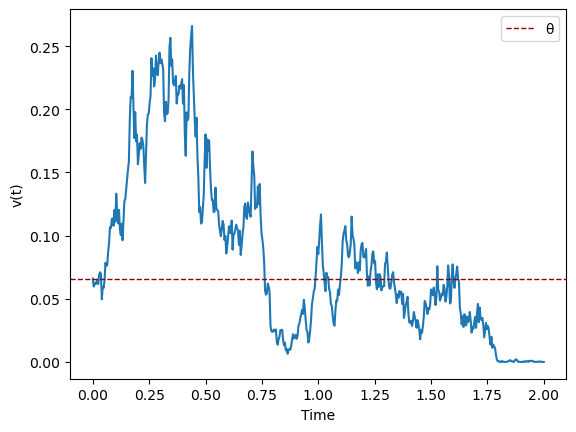

In [9]:
i = 0
plt.plot(torch.linspace(0, N_STEPS * DT, N_STEPS + 1), cir_paths[i])
plt.axhline(THETA.item(), ls='--', label='θ', lw=1, c='darkred')
plt.ylabel('v(t)')
plt.xlabel('Time')
plt.legend()
plt.show()

# Heston simulation

In [10]:
init_state_price = S0 * torch.ones(N_PATHS, dtype=torch.double)
init_state_var = V0 * torch.ones(N_PATHS, dtype=torch.double)
heston_paths, var_paths = heston.generate_heston(
    N_PATHS, N_STEPS, DT, init_state_price, init_state_var, KAPPA, THETA, EPS, RHO, RATE)

In [11]:
def plot_heston(i):
    time = torch.linspace(0, N_STEPS * DT, N_STEPS + 1)
    plt.plot(time, heston_paths[i])
    plt.ylabel('S')
    plt.xlabel('Time')
    plt.show()

    plt.plot(time, var_paths[i])
    plt.axhline(THETA.item(), ls='--', label='θ', lw=1, c='darkred')
    plt.ylabel('Variance')
    plt.xlabel('Time')
    plt.legend()
    plt.show()

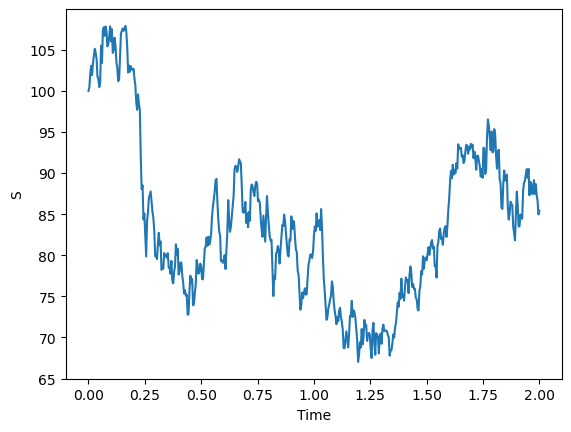

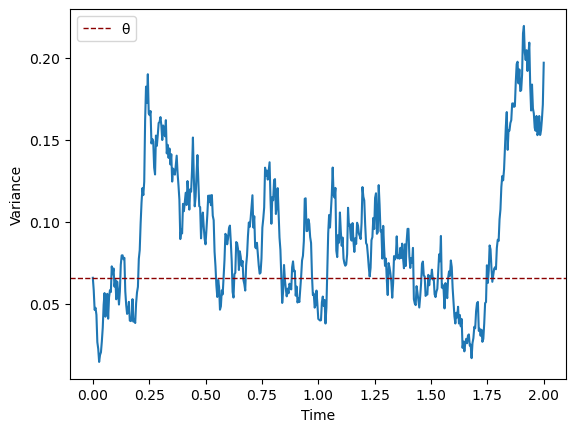

In [12]:
plot_heston(0)

## Compare moments of $\ln X(t)$ and $V(t)$ with analytical formulas

For reference see [Andersen 2007, Appendix A, Table 6]. The formulas are for the case with zero drift.

In [13]:
def get_expectation_log_path(log_S0, kappa, theta, v0, t: np.array) -> np.array:
    return log_S0 + 1/(2*kappa) * (theta - v0) * (1 - np.exp(-kappa*t)) - 0.5*theta*t

def get_var_log_path(kappa, theta, eps, rho, v0, t: np.array) -> np.array:
    omega1 = np.exp(-2*kappa*t) * eps**2 \
             + 4*np.exp(-kappa*t) * ((1+kappa*t)*eps**2 - 2*rho*kappa*eps*(2+kappa*t) + 2*kappa**2) \
             + (2*kappa*t - 5) * eps**2 - 8*rho*kappa*eps*(kappa*t - 2) + 8*kappa**2*(kappa*t - 1)
    omega2 = -np.exp(-2*kappa*t)*eps**2 \
             + 2*np.exp(-kappa*t) * (-kappa*t*eps**2 + 2*rho*eps*kappa*(1+kappa*t) - 2*kappa**2) + eps**2 - 4*kappa*rho*eps + 4*kappa**2
    return theta/(8 * kappa ** 3)*omega1 + v0/(4 * kappa ** 3)*omega2

def get_expectation_var_path(kappa, theta, v0, t: np.array):
    return theta + (v0 - theta) * np.exp(-kappa*t)

def get_var_var_path(kappa, eps, theta, v0, t: np.array):
    result = v0*eps**2/kappa * (np.exp(-kappa*t) - np.exp(-2*kappa*t)) \
             + theta*eps**2/(2*kappa) * (1 - np.exp(-kappa*t))**2
    return result

In [14]:
def plot_comparison(analytical: np.array, simulated: np.array, time: np.array, title: str):
    plt.plot(time, analytical, label='Analytical')
    plt.plot(time, simulated, label='Simulated')
    plt.title(title)
    plt.xlabel('Time')
    plt.legend()
    plt.show()

In [15]:
def plot_error(analytical: np.array, simulated: np.array, time):
    plt.plot(time, np.abs(simulated - analytical) / analytical)
    plt.title('Absolute relative error')
    plt.xlabel('Time')
    plt.show()

In [16]:
time_arr = np.linspace(0, N_STEPS * DT, N_STEPS + 1)

### 1. $\mathbb{E}\left[ \ln X(t) \right]$

In [17]:
expectation_log_path = get_expectation_log_path(math.log(S0.item()), KAPPA.item(), THETA.item(), V0.item(), time_arr)
expectation_log_path_mc = torch.log(heston_paths).mean(dim=0).numpy()

In [18]:
np.allclose(expectation_log_path_mc, expectation_log_path, atol=1e-3, rtol=1e-3)

True

In [19]:
np.mean(np.abs(expectation_log_path_mc - expectation_log_path))

5.754103871258542e-05

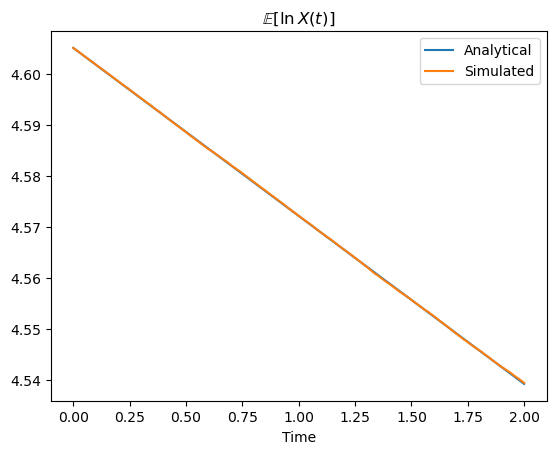

In [20]:
plot_comparison(expectation_log_path, expectation_log_path_mc, time_arr,
                '$\mathbb{E}\left[ \ln X(t) \\right]$')

### 2. $\text{Var}\left[ \ln X(t) \right]$

In [21]:
var_log_path = get_var_log_path(KAPPA.item(), THETA.item(), EPS.item(), RHO.item(), V0.item(), time_arr)
var_log_path_mc = (heston_paths.log() - expectation_log_path_mc).pow(2).sum(dim=0) / (heston_paths.shape[0] - 1)
var_log_path_mc = var_log_path_mc.numpy()

In [22]:
np.allclose(var_log_path_mc, var_log_path, atol=1e-3, rtol=1e-3)

True

In [23]:
np.mean(np.abs((var_log_path_mc - var_log_path)))

0.00011829627617031831

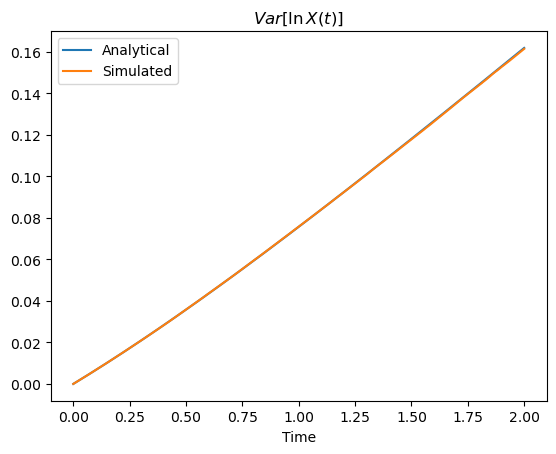

In [24]:
plot_comparison(var_log_path, var_log_path_mc, time_arr,
                r'$Var\left[ \ln X(t) \right]$')

### 3. $\mathbb{E}\left[ V(t) \right]$

In [25]:
expectation_var_path = get_expectation_var_path(KAPPA.item(), THETA.item(), V0.item(), time_arr)
expectation_var_path_mc = var_paths.mean(dim=0).numpy()

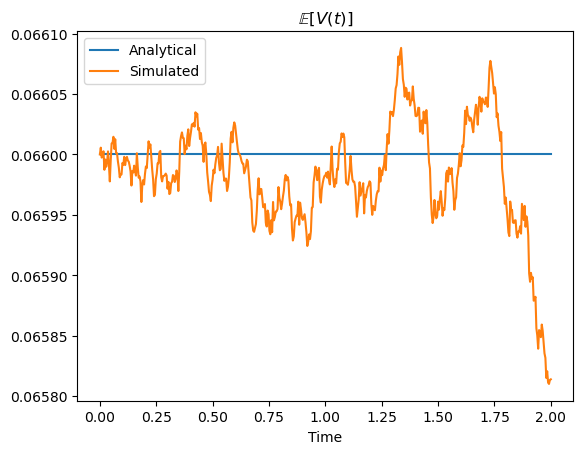

In [26]:
plot_comparison(expectation_var_path, expectation_var_path_mc, time_arr,
                '$\mathbb{E}\left[ V(t) \\right]$')

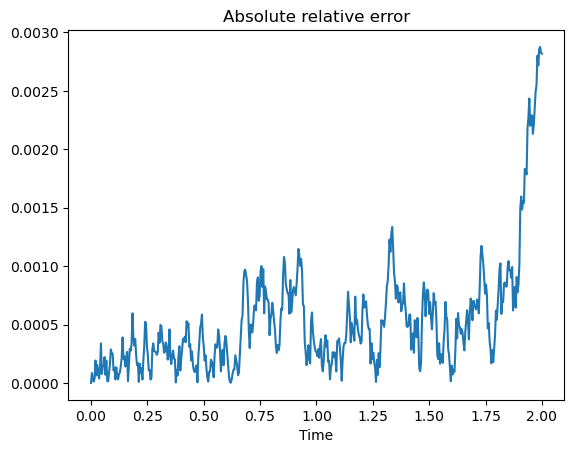

In [27]:
plot_error(expectation_var_path, expectation_var_path_mc, time_arr)

### 4. $\text{Var}\left[ V(t) \right]$

In [28]:
var_var_path = get_var_var_path(KAPPA.item(), EPS.item(), THETA.item(), V0.item(), time_arr)
var_var_path_mc = (var_paths - expectation_var_path_mc).pow(2).sum(dim=0) / (var_paths.shape[0] - 1)
var_var_path_mc = var_var_path_mc.numpy()

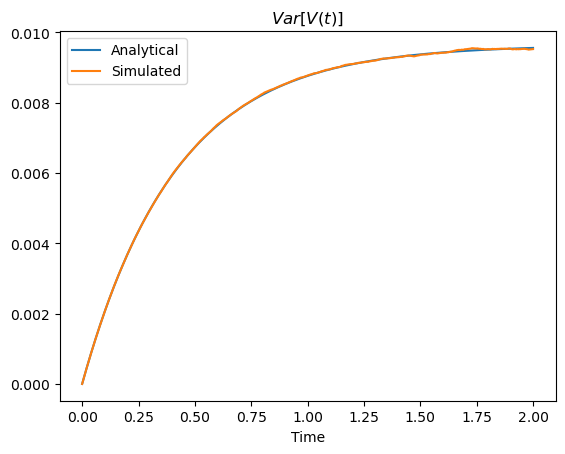

In [29]:
plot_comparison(var_var_path, var_var_path_mc, time_arr,
                r'$Var\left[ V(t) \right]$')

/tmp/ipykernel_974867/4102386183.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(time, np.abs(simulated - analytical) / analytical)


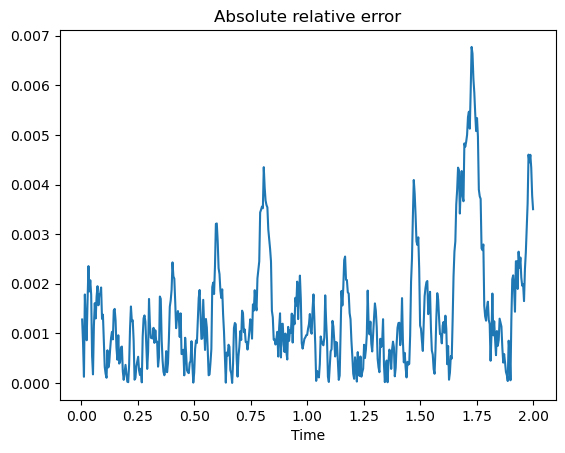

In [30]:
plot_error(var_var_path, var_var_path_mc, time_arr)

We can see that the moments of simulated processes are close to analytial.

# Monte-Carlo pricing of European Vanilla Call Option

In [31]:
RATE = torch.tensor([0.03], dtype=torch.double)
time_arr = np.linspace(0, N_STEPS * DT, N_STEPS + 1)

In [32]:
# list of strikes from code from supplementary materials to [Cui2017]
strike_arr = [
    0.6137, 0.6699, 0.7216, 0.7470, 0.7760, 0.8112, 0.8603, 0.9025,
    0.9175, 0.9358, 0.9371, 0.9464, 0.9588, 0.9728, 0.9868, 0.9956,
    1.0427, 1.0463, 1.0499, 1.0530, 1.0562, 1.0593, 1.0663, 1.0766,
    1.2287, 1.2399, 1.2485, 1.2659, 1.2646, 1.2715, 1.2859, 1.3046,
    1.3939, 1.4102, 1.4291, 1.4456, 1.4603, 1.4736, 1.5005, 1.5328]
strike_arr = [k * S0.item() for k in strike_arr]

# list of maturities
maturity_arr = 5 * [x / 365 for x in [45., 90., 135., 180., 225., 270., 405., 540.]]

assert len(strike_arr) == len(maturity_arr)

In [33]:
# regenerate paths with non-zero rate
init_state_price = S0 * torch.ones(N_PATHS, dtype=torch.double)
init_state_var = V0 * torch.ones(N_PATHS, dtype=torch.double)
heston_paths, var_paths = heston.generate_heston(
    N_PATHS, N_STEPS, DT, init_state_price, init_state_var, KAPPA, THETA, EPS, RHO, RATE)

In [34]:
def call_payoff(S, K):
    return torch.maximum(S - K, torch.zeros_like(S))

In [35]:
euro_prices_mc = []
for i in range(len(strike_arr)):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr[i]))
    T_actual = DT * expiry_idx
    price = torch.exp(-RATE * T_actual) * call_payoff(heston_paths[:, expiry_idx], strike_arr[i]).mean()
    euro_prices_mc.append(price.item())

In [36]:
table_vanilla = pd.DataFrame({'Maturity': maturity_arr, 'Strike': strike_arr, 'Price MC': euro_prices_mc})
print(f'κ = {KAPPA.item()}, θ = {THETA.item()}, ε = {EPS.item()}, ρ = {RHO.item()}, rate = {RATE.item()}')
print(f'S₀ = {S0.item()}\n')
print('======== In the money =========\n')
for i in range(5):
    print(table_vanilla.iloc[i * 8: (i + 1) * 8], end='\n\n')
    if i == 1:
        print('======= Out of the money =======\n')

κ = 1.2, θ = 0.066, ε = 0.592, ρ = -0.65, rate = 0.03
S₀ = 100.0

======== In the money =========

   Maturity  Strike   Price MC
0  0.123288   61.37  38.871995
1  0.246575   66.99  33.575921
2  0.369863   72.16  28.988137
3  0.493151   74.70  27.173044
4  0.616438   77.60  25.192449
5  0.739726   81.12  22.813785
6  1.109589   86.03  20.754762
7  1.479452   90.25  19.478087

    Maturity  Strike   Price MC
8   0.123288   91.75   9.539948
9   0.246575   93.58   9.477135
10  0.369863   93.71  10.482053
11  0.493151   94.64  10.812111
12  0.616438   95.88  10.866274
13  0.739726   97.28  10.771868
14  1.109589   98.68  12.086144
15  1.479452   99.56  13.520958

======= Out of the money =======

    Maturity  Strike  Price MC
16  0.123288  104.27  1.777918
17  0.246575  104.63  2.972947
18  0.369863  104.99  3.844357
19  0.493151  105.30  4.629072
20  0.616438  105.62  5.330479
21  0.739726  105.93  5.967633
22  1.109589  106.63  7.764333
23  1.479452  107.66  9.218169

    Maturity  Stri

The prices obtained with Monte-Carlo method are close to analytical prices.

# Monte-Carlo pricing of Barrier Options

Barrier options have the following payoffs:
$$\text{UpIn Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ \geq\ B \right\}},$$

$$\text{UpIn Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ \geq\ B \right\}},$$

$$\text{UpOut Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ <\ B \right\}},$$

$$\text{UpOut Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ <\ B \right\}},$$

$$\text{DownIn Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ \leq\ B \right\}},$$

$$\text{DownIn Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ \leq\ B \right\}},$$

$$\text{DownOut Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ >\ B \right\}},$$

$$\text{DownOut Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ >\ B \right\}},$$

where $S$ – price of the underlying, $T$ – maturity, $K$ – strike, $B$ – barrier. See [review of barrier options](https://bookdown.org/maxime_debellefroid/MyBook/barrier-options.html).


In [37]:
%pycat pyquant/barrier.py

import torch


def price_barrier_option(
        paths: torch.Tensor,
        strike: torch.Tensor,
        maturity: torch.Tensor,
        rate: torch.Tensor,
        barrier: torch.Tensor,
        barrier_type: str,
        call: bool
) -> torch.Tensor:
    """Compute the price of a barrier option.

    Args:
        paths: Simulated paths of the underlying.
        strike: Strike price.
        maturity: Expiration time in years (corresponding to `paths[:, -1]`).
        rate: Risk-free rate.
        barrier: Barrier price.
        barrier_type: One of 'up-in', 'up-out', 'down-in', 'down-out'.
        call: If `True`, price call option, otherwise price put option.

    Shape:
        - paths: (N, M + 1), where N is the number of paths, M is the number of
            time steps. The last time point is assumed to be the expiration time.
        - strike, maturity, rate, barrier: (1, ).

    Returns:
        Price of the option. Shape: (1, ).
    """
    if barrier_type not in ('up-in'

In [38]:
from pyquant.barrier import price_barrier_option

In [39]:
strike_arr_up = torch.tensor(strike_arr[16:24], dtype=torch.double)
strike_arr_down = torch.tensor(strike_arr[8:16], dtype=torch.double)
maturity_arr_up = torch.tensor(maturity_arr[16:24], dtype=torch.double)
maturity_arr_down = torch.tensor(maturity_arr[8:16], dtype=torch.double)

prices_vanilla_itm = table_vanilla['Price MC'][8:16]
prices_vanilla_otm = table_vanilla['Price MC'][16:24]

barriers_up_in = torch.tensor([K + (K-S0)*3 for K in strike_arr_up], dtype=torch.double)
barriers_up_out = torch.tensor([K + (K-S0)*4 for K in strike_arr_up], dtype=torch.double)
barriers_down_in = torch.tensor([95., 95., 94., 94., 94., 93., 92., 92.], dtype=torch.double)
barriers_down_out = torch.tensor([95., 95., 94., 94., 94., 93., 92., 92.], dtype=torch.double)

prices_up_in = []
prices_up_out = []
prices_down_in = []
prices_down_out = []

# Up-and-In
for i in range(len(barriers_up_in)):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_up[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_up[i],
        maturity_arr_up[i],
        RATE,
        barrier=barriers_up_in[i],
        barrier_type='up-in',
        call=True)
    prices_up_in.append(price.item())

# Up-and-Out
for i in range(len(barriers_up_out)):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_up[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_up[i],
        maturity_arr_up[i],
        RATE,
        barrier=barriers_up_out[i],
        barrier_type='up-out',
        call=True)
    prices_up_out.append(price.item())

# Down-and-In
for i in range(len(barriers_down_in)):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_down[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_down[i],
        maturity_arr_down[i],
        RATE,
        barrier=barriers_down_in[i],
        barrier_type='down-in',
        call=True)
    prices_down_in.append(price.item())

# Down-and-Out
for i in range(len(barriers_down_out)):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_down[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_down[i],
        maturity_arr_down[i],
        RATE,
        barrier=barriers_down_out[i],
        barrier_type='down-out',
        call=True)
    prices_down_out.append(price.item())

In [40]:
table_up_in = pd.DataFrame({'Maturity': maturity_arr_up, 'Strike': strike_arr_up,
                            'Barrier': barriers_up_in, 'Price': prices_up_in,
                            'Vanilla price': prices_vanilla_otm}).reset_index(drop=True)
table_up_out = pd.DataFrame({'Maturity': maturity_arr_up, 'Strike': strike_arr_up,
                             'Barrier': barriers_up_out, 'Price': prices_up_out,
                             'Vanilla price': prices_vanilla_otm}).reset_index(drop=True)
table_down_in = pd.DataFrame({'Maturity': maturity_arr_down, 'Strike': strike_arr_down,
                              'Barrier': barriers_down_in, 'Price': prices_down_in,
                              'Vanilla price': prices_vanilla_itm}).reset_index(drop=True)
table_down_out = pd.DataFrame({'Maturity': maturity_arr_down, 'Strike': strike_arr_down,
                               'Barrier': barriers_down_out, 'Price': prices_down_out,
                               'Vanilla price': prices_vanilla_itm}).reset_index(drop=True)

print(f'κ = {KAPPA.item()}, θ = {THETA.item()}, ε = {EPS.item()}, ρ = {RHO.item()}, rate = {RATE.item()}')
print(f'S₀ = {S0.item()}\n')
print('===================== Up-and-In Call ======================\n')
print(table_up_in)
print('\n=================== Up-and-Out Call =======================\n')
print(table_up_out)
print('\n=================== Down-and-In Call ======================\n')
print(table_down_in)
print('\n=================== Down-and-Out Call =====================\n')
print(table_down_out)

κ = 1.2, θ = 0.066, ε = 0.592, ρ = -0.65, rate = 0.03
S₀ = 100.0

===================== Up-and-In Call ======================

   Maturity  Strike  Barrier     Price  Vanilla price
0  0.123288  104.27   117.08  0.343484       1.777918
1  0.246575  104.63   118.52  1.197413       2.972947
2  0.369863  104.99   119.96  1.905544       3.844357
3  0.493151  105.30   121.20  2.575507       4.629072
4  0.616438  105.62   122.48  3.179149       5.330479
5  0.739726  105.93   123.72  3.737981       5.967633
6  1.109589  106.63   126.52  5.477870       7.764333
7  1.479452  107.66   130.64  6.706905       9.218169

=================== Up-and-Out Call =======================

   Maturity  Strike  Barrier     Price  Vanilla price
0  0.123288  104.27   121.35  1.678614       1.777918
1  0.246575  104.63   123.15  2.385242       2.972947
2  0.369863  104.99   124.95  2.754434       3.844357
3  0.493151  105.30   126.50  3.024644       4.629072
4  0.616438  105.62   128.10  3.264104       5.330479
5

We can see that barrier options have lower price than similar vanilla options. That's because they carry an additional risk to expire worthless.

# References

* [Andersen2007] [Andersen, L.B., 2007. Efficient simulation of the Heston stochastic volatility model. Available at SSRN 946405.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=946405)
* [Grzelak2019] Grzelak, L.A. et al. *Mathematical Modeling and Computation in Finance: With Exercises and Python and MATLAB Computer Codes*, World Scientific Pub. (2019)
* [Cui2017] [Cui, Y. et al. *Full and fast calibration of the Heston stochastic volatility model.* European Journal of Operational Research 263.2 (2017)](https://www.sciencedirect.com/science/article/pii/S0377221717304460)
* [Online book about derivatives by Maxime de Bellefroid](https://bookdown.org/maxime_debellefroid/MyBook/)